# PNN rubata su github + ChatGPT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Librerie da importare**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

# **Installare numpy e sklearn se mancano**

In [ ]:
!pip install numpy
!pip install sklearn

# **Caricamento del dataset**

In [ ]:
# Load dataset
iris = load_iris()
data, labels = iris.data, iris.target

print(iris)

# **Conversione delle label in interi e viceversa**

# Caricamento datasets BABELE


*   Training set
*   Validation set
*   Test set




## Caricamento Training set BABELE




In [3]:
df_train = pd.read_csv('/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_DATASET_OPTICAL_FLOW/Train/TWO_FRAME/Train_babele_lips_optical_flow_two_consecutive_frame.csv')

# Rimuove le colonna "target" e "video-frame" dal dataset e assegna i dati rimanenti alla matrice delle features X
X_train = df_train.drop(columns=['target', 'video-frame'], axis=1); #TRAIN X
print(50*"-"+"X_TRAIN"+"-"*50)
print(X_train)

# Seleziona la colonna "target" e assegna i dati all'array delle etichette Y
Y_train = df_train[['target']] #TRAIN Y
print(50*"-"+"Y_TRAIN"+"-"*50)
print(Y_train)

--------------------------------------------------X_TRAIN--------------------------------------------------
     media_orizzontale0  media_verticale0  media_orizzontale1  \
0             -0.285792         -0.501415           -0.379346   
1             -0.004799          0.044079           -0.059610   
2              0.333742          0.302033            1.022748   
3             -0.185264          0.182372            0.087246   
4              1.928872          0.155694           -0.763132   
..                  ...               ...                 ...   
955           -0.089506         -0.026639            0.128954   
956            0.119870          0.109561            0.130387   
957            0.071260          0.028772           -0.341953   
958            0.379223          0.144704           -0.413418   
959            0.303436          0.052951           -0.431853   

     media_verticale1  media_orizzontale2  media_verticale2  \
0           -0.714879            0.176099       

## Caricamento Validation set BABELE


In [ ]:
df_validation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Biometria/CSV_DATASET/Validation.csv')

# Rimuove le colonna "target" e "video-frame" dal dataset e assegna i dati rimanenti alla matrice delle features X
X_validation = df_validation.drop(columns=['target', 'video-frame'], axis=1); #TRAIN X
print(50*"-"+"X_VALIDATION"+"-"*50)
print(X_validation)

# Seleziona la colonna "target" e assegna i dati all'array delle etichette Y
Y_validation = df_validation[['target']] 
print(50*"-"+"Y_VALIDATION"+"-"*50)
print(Y_validation)





--------------------------------------------------X_VALIDATION--------------------------------------------------
         37-267     61-306     84-314      37-84       0-17    267-314
0      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
1      9.000000  27.018512   8.000000  15.132746  15.132746  15.033296
2      8.000000  26.019224   8.000000  11.000000  10.000000  11.000000
3      8.000000  25.000000   8.062258  13.000000  12.000000  12.000000
4      7.000000  24.000000   8.000000  13.000000  13.000000  13.038405
...         ...        ...        ...        ...        ...        ...
1595  10.440307  30.805844   9.219544  14.317821  14.560220  13.601471
1596  10.198039  32.984845   9.219544  12.369317  13.601471  12.649111
1597   9.055385  31.400637  10.198039  15.297059  16.278821  16.124515
1598  10.198039  31.575307  10.198039  15.132746  16.124515  15.132746
1599  13.038405  42.426407  13.152946  21.213203  22.203603  22.203603

[1600 rows x 6 columns]
----------

## Caricamento Test set BABELE

In [4]:
df_test = pd.read_csv('/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_DATASET_OPTICAL_FLOW/Test/TWO_FRAME/Test_babele_lips_optical_flow_two_consecutive_frame.csv')

# Rimuove la colonna "target" dal dataset e assegna i dati rimanenti alla matrice delle features X
X_test = df_test.drop(columns=['target', 'video-frame'], axis=1); #TRAIN X
print(50*"-"+"X_TEST"+"-"*50)
print(X_test)

# Seleziona la colonna "target" e assegna i dati all'array delle etichette Y
Y_test = df_test[['target']] #TRAIN Y
print(Y_test)

--------------------------------------------------X_TEST--------------------------------------------------
     media_orizzontale0  media_verticale0  media_orizzontale1  \
0             -0.006102          0.317315           -0.095067   
1             -0.295433          0.594529            0.200998   
2              0.266843         -0.192044           -0.109969   
3             -0.313163          0.508695            0.145820   
4              0.730532         -0.559686           -0.207178   
..                  ...               ...                 ...   
155            0.127932         -0.062204            0.003425   
156            0.110502          0.757096           -0.073366   
157           -0.271389         -0.538504            0.131899   
158           -1.100133          0.823643            0.604731   
159           -0.876655          0.316537           -1.577742   

     media_verticale1  media_orizzontale2  media_verticale2  \
0           -0.337517            0.271779        

In [ ]:
# Identifica le etichette di classe uniche presenti nel set di dati
unique_labels = np.unique(labels)

# Crea un dizionario che mappa ogni etichetta di classe ad un intero univoco
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}

# Crea un dizionario che mappa ogni intero univoco ad un'etichetta di classe corrispondente
int_to_label = {idx: label for label, idx in label_to_int.items()}

# Converte l'array di etichette di classe in un array di interi utilizzando il dizionario label_to_int
labels = np.array([label_to_int[label] for label in labels])

# **Definizione della classe PNN**

In [6]:
class PNN:
    def __init__(self, std):
        #deviazione standard,  misura di dispersione che indica quanto i dati in un set di dati sono distribuiti attorno alla media
        self.std = std 
    
    # il metodo 'fit' che viene utilizzato per addestrare il classificatore, prendendo in input le feature
    # di training X e le etichette di classe di training y.
    def fit(self, X, y):
        self.X = X
        self.y = y

    # il metodo 'predict' viene utilizzato per effettuare la predizione delle etichette di classe 
    # per un insieme di feature di test X.
    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        for i in range(n_samples):
            x = X[i]
            diff = self.X - x
            norm = np.sum(diff ** 2, axis=1)
            kernel = np.exp(- norm / (2 * self.std ** 2)) #funzione kernel gaussiana per ogni distanza euclidea calcolata
            y_pred[i] = np.argmax(np.bincount(self.y, weights=kernel))
        return y_pred

# **Train della PNN**

In [ ]:
# Creazione e train della PNN
pnn = PNN(std=0.1)

# Seleziona le colonne desiderate come feature e etichette di classe
X = iris.data[:, [0, 1, 2, 3]]  # supponiamo che le feature siano le prime tre colonne
y = iris.target  # supponiamo che l'etichetta di classe sia l'ultima colonna

# Divisone dei dati in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
pnn.fit(X_train, y_train)

In [ ]:
# Crea un DataFrame con i dati di addestramento
train_df = pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Aggiungi una colonna 'class' al DataFrame contenente le etichette di classe di addestramento
train_df['class'] = y_train

# Stampa il DataFrame ordinato in base alle etichette di classe
print(train_df.sort_values(by='class'))

In [ ]:
# Crea un DataFrame con i dati di test
test_df = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Aggiungi una colonna 'class' al DataFrame contenente le etichette di classe di test
test_df['class'] = y_test

# Stampa il DataFrame ordinato in base alle etichette di classe
print(test_df.sort_values(by='class'))

In [ ]:
# Test PNN
y_pred = pnn.predict(X_test)

KeyError: ignored

In [ ]:
# Creazione e train della PNN
pnn = PNN(std=0.1)
pnn.fit(X_train.values, Y_train.values)

print(X_test)
# Test PNN
y_pred = pnn.predict(X_test)

         37-267     61-306     84-314      37-84       0-17    267-314
0     11.704700  38.275318  11.704700  15.524175  15.524175  15.524175
1     10.440307  32.984845   9.486833  12.165525  12.369317  12.369317
2      9.219544  26.476405   8.246211  16.124515  16.278821  16.278821
3     11.401754  34.713110  11.180340  15.132746  15.132746  14.142136
4     10.198039  30.413813   9.055385  14.035669  14.142136  13.152946
...         ...        ...        ...        ...        ...        ...
1595   6.082763  20.099751   6.000000  12.649111  12.369317  11.704700
1596   7.071068  21.213203   7.071068  11.045361  11.045361  11.045361
1597   7.000000  22.022716   7.071068  11.045361  12.000000  12.041595
1598   7.000000  23.000000   8.000000  14.000000  14.035669  14.035669
1599   7.000000  24.020824   8.000000  13.000000  14.035669  13.038405

[1600 rows x 6 columns]


KeyError: ignored

# **Calcolo dell'accuracy**

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy* 100)

NameError: ignored

# **Grafico Predizione e label positive**

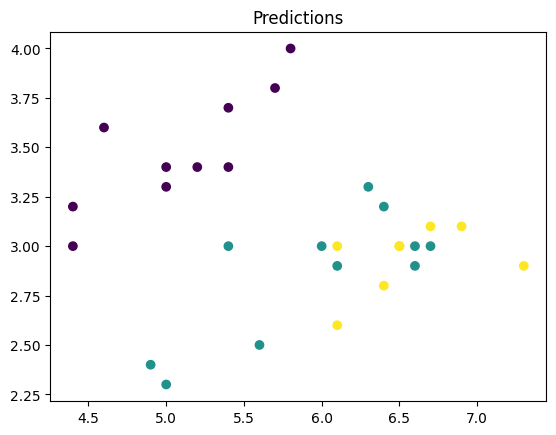

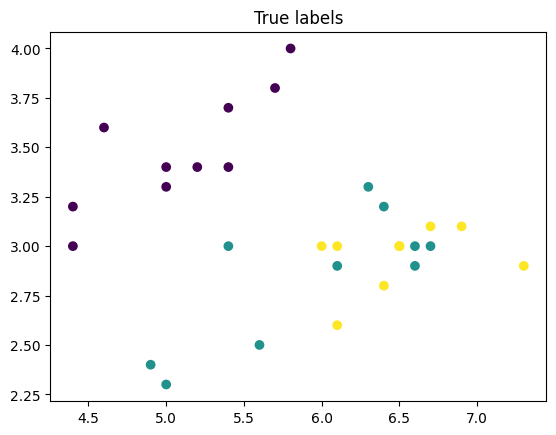

In [ ]:
# Plot predictions vs. true labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title('Predictions')
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('True labels')
plt.show()

In [ ]:
# Select a single flower
flower_idx = 10  # Index of the flower in the dataset
flower = X[flower_idx]  # Features of the flower

# Generate random flower
random_flower = np.array([3.1, 4.5, 5.2, 2.1])
print(random_flower)

# Make prediction for single flower
flower_pred = pnn.predict(random_flower.reshape(1, -1))

# Map predicted label to class name
predicted_class = int_to_label[flower_pred[0]]

print(flower_pred[0])
# Print predicted class
print('Predicted class:', predicted_class)

[3.1 4.5 5.2 2.1]
2.0
Predicted class: 2
